In [1]:
import numpy as np
import pandas as pd

# DATA PREPROCESSING

In [2]:
data = pd.read_csv("Fraud.csv")

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.shape

(6362620, 11)

In [5]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().values.any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

In [9]:
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [10]:
X = data[data['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# VISUALISATION 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/6q/fn84x13j7f71ynxjrwfxbtwc0000gp/T/ipykernel_10022/3381966614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

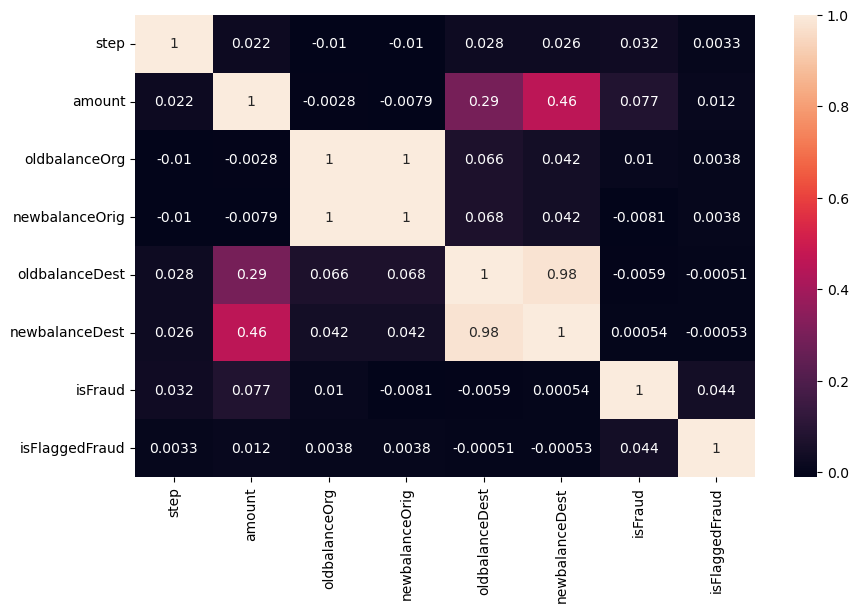

In [12]:
corr=data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

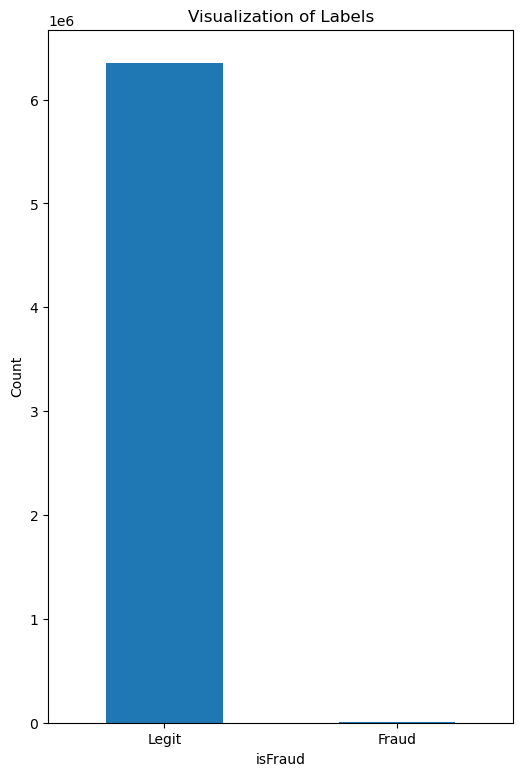

In [13]:
plt.figure(figsize=(6,9))
labels = ["Legit", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

LABEL ENCODING

In [14]:
data_copy = data.copy()
data_copy

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [15]:
objList = data_copy.select_dtypes(include = "object").columns

In [16]:
objList

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

for feat in objList:
    data_copy[feat] = le.fit_transform(data_copy[feat].astype(str))

In [19]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


    MULTI-COLINEARITY

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
def calc_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    return(vif)

calc_vif(data_copy)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones

In [22]:
data_copy['Actual_amount_orig'] = data_copy.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
data_copy['Actual_amount_dest'] = data_copy.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
data_copy['TransactionPath'] = data_copy.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
data_copy = data_copy.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(data_copy)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

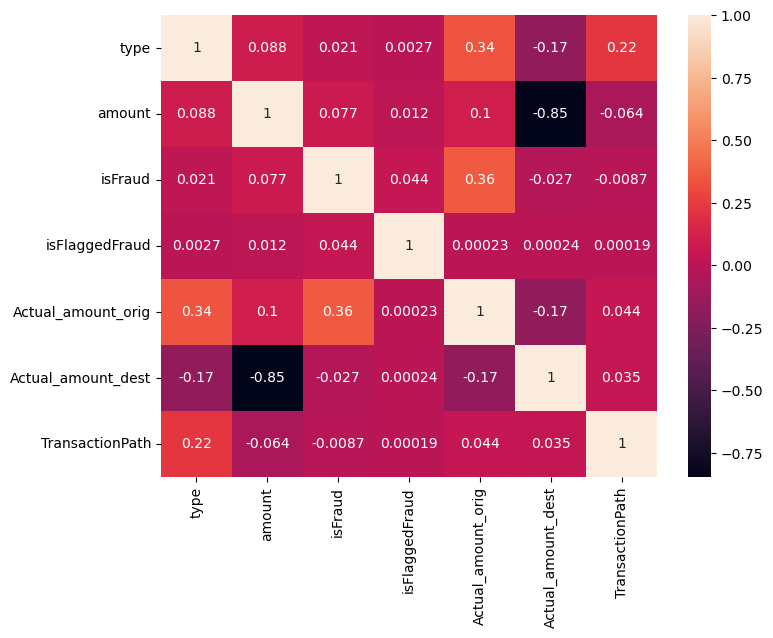

In [23]:
corr = data_copy.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# MODEL BUILDING

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

SCALING

In [25]:
scaler = StandardScaler()
data_copy.drop(["amount"], inplace= True, axis= 1)

Y = data_copy["isFraud"]
X = data_copy.drop(["isFraud"], axis= 1)

TRAIN-TEST SPLIT

In [26]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.25, random_state= 42)

DECISION TREE

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_DTC = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred_RFC = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

EVALUATION AND COMPARISON

In [47]:
decision_tree_score

99.91714105195658

In [48]:
random_forest_score

99.95831905724371

It's obvious that the Random Forest performs better than the Decision Tree

In [52]:
confusion_matrix_DTC = confusion_matrix(Y_test, Y_pred_DTC.round())
confusion_matrix_DTC

array([[1587901,     709],
       [    609,    1436]])

In [54]:
confusion_matrix_RFC = confusion_matrix(Y_test, Y_pred_RFC.round())
confusion_matrix_RFC

array([[1588544,      66],
       [    597,    1448]])

In [55]:
classification_report_DTC = classification_report(Y_test, Y_pred_DTC)
classification_report_DTC

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1588610\n           1       0.67      0.70      0.69      2045\n\n    accuracy                           1.00   1590655\n   macro avg       0.83      0.85      0.84   1590655\nweighted avg       1.00      1.00      1.00   1590655\n'

In [56]:
classification_report_RFC = classification_report(Y_test, Y_pred_RFC)
classification_report_RFC

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1588610\n           1       0.96      0.71      0.81      2045\n\n    accuracy                           1.00   1590655\n   macro avg       0.98      0.85      0.91   1590655\nweighted avg       1.00      1.00      1.00   1590655\n'

With Such a good precision and hence F1-Score, Random Forest comes out to be better.

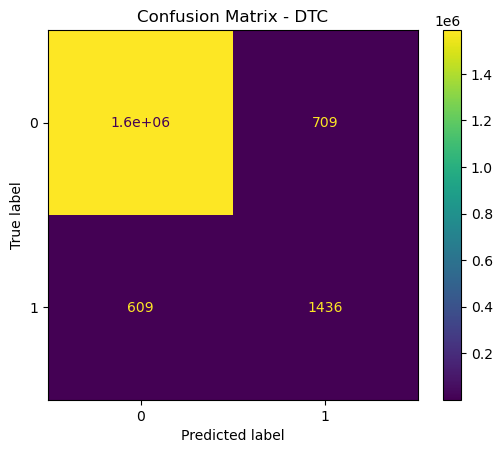

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_DTC)
disp.plot()
plt.title('Confusion Matrix - DTC')
plt.show()

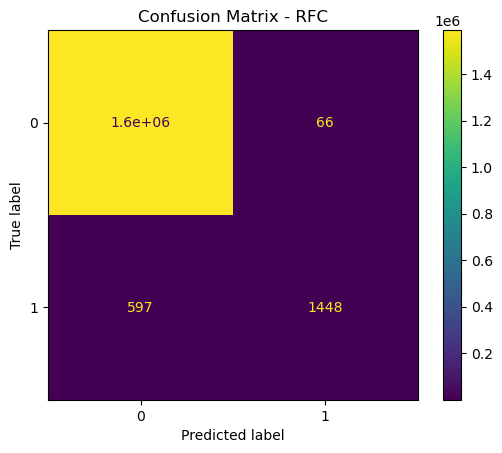

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_RFC)
disp.plot()
plt.title('Confusion Matrix - RFC')
plt.show()

In [33]:
!pip install xgboost

In [34]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
xgb_model = xgb.XGBClassifier(n_estimators=500, max_depth=5, learning_rate=0.0625)

xgb_model.fit(X_train, Y_train)

y_pred_xgb = xgb_model.predict(X_test)

In [131]:
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
accuracy_xgb_score = accuracy_xgb * 100
accuracy_xgb_score

99.95976500246753

In [110]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {
    'n_estimators': [200, 250, 300, 350, 400, 450, 500, 550],     
    'max_depth': [3, 4, 5],               
}

xgb_model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

In [125]:
# Create an AdaBoost classifier
Ada_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.025)

Ada_model.fit(X_train, Y_train)

y_pred_Ada = Ada_model.predict(X_test)

accuracy_Ada = accuracy_score(Y_test, y_pred_Ada)
accuracy_Ada_score = accuracy_Ada * 100
accuracy_Ada_score

99.89589194388475

In [120]:
# Create a Gradient Boosting classifier
Gb_model = GradientBoostingClassifier(n_estimators=500, max_depth=5, learning_rate=0.02)

Gb_model.fit(X_train, Y_train)

y_pred_Gb = Gb_model.predict(X_test)

accuracy_Gb = accuracy_score(Y_test, y_pred_Gb)
accuracy_Gb_score = accuracy_Gb * 100
accuracy_Gb_score

99.95530143242878

We can see that the XGBoost model outperforms both AdaBoost and Gradient Boosting 

In [133]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 9.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.8 MB/s eta 0:00:00


In [134]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=500,  # Equivalent to n_estimators
    depth=5,          # Equivalent to max_depth
    learning_rate=0.0625,
)

catboost_model.fit(X_train, Y_train)

y_pred_catboost = catboost_model.predict(X_test)

0:	learn: 0.4404427	total: 453ms	remaining: 3m 45s
1:	learn: 0.2782572	total: 841ms	remaining: 3m 29s
2:	learn: 0.1871013	total: 1.09s	remaining: 3m 1s
3:	learn: 0.1279907	total: 1.32s	remaining: 2m 44s
4:	learn: 0.0896672	total: 1.58s	remaining: 2m 36s
5:	learn: 0.0641919	total: 1.79s	remaining: 2m 27s
6:	learn: 0.0437264	total: 2.01s	remaining: 2m 21s
7:	learn: 0.0329443	total: 2.23s	remaining: 2m 17s
8:	learn: 0.0239413	total: 2.44s	remaining: 2m 13s
9:	learn: 0.0189885	total: 2.63s	remaining: 2m 8s
10:	learn: 0.0145263	total: 2.85s	remaining: 2m 6s
11:	learn: 0.0120796	total: 3.05s	remaining: 2m 3s
12:	learn: 0.0102561	total: 3.26s	remaining: 2m 2s
13:	learn: 0.0084502	total: 3.48s	remaining: 2m
14:	learn: 0.0074607	total: 3.75s	remaining: 2m 1s
15:	learn: 0.0064186	total: 3.96s	remaining: 1m 59s
16:	learn: 0.0058511	total: 4.22s	remaining: 1m 59s
17:	learn: 0.0052252	total: 4.42s	remaining: 1m 58s
18:	learn: 0.0047330	total: 4.62s	remaining: 1m 56s
19:	learn: 0.0043536	total: 4.81

158:	learn: 0.0023439	total: 34.6s	remaining: 1m 14s
159:	learn: 0.0023436	total: 34.8s	remaining: 1m 13s
160:	learn: 0.0023434	total: 35s	remaining: 1m 13s
161:	learn: 0.0023433	total: 35.2s	remaining: 1m 13s
162:	learn: 0.0023423	total: 35.4s	remaining: 1m 13s
163:	learn: 0.0023420	total: 35.7s	remaining: 1m 13s
164:	learn: 0.0023413	total: 35.9s	remaining: 1m 12s
165:	learn: 0.0023407	total: 36.1s	remaining: 1m 12s
166:	learn: 0.0023405	total: 36.2s	remaining: 1m 12s
167:	learn: 0.0023391	total: 36.4s	remaining: 1m 11s
168:	learn: 0.0023373	total: 36.6s	remaining: 1m 11s
169:	learn: 0.0023354	total: 36.9s	remaining: 1m 11s
170:	learn: 0.0023352	total: 37.1s	remaining: 1m 11s
171:	learn: 0.0023347	total: 37.3s	remaining: 1m 11s
172:	learn: 0.0023344	total: 37.6s	remaining: 1m 11s
173:	learn: 0.0023326	total: 37.8s	remaining: 1m 10s
174:	learn: 0.0023324	total: 38s	remaining: 1m 10s
175:	learn: 0.0023315	total: 38.2s	remaining: 1m 10s
176:	learn: 0.0023312	total: 38.4s	remaining: 1m 1

317:	learn: 0.0022820	total: 1m 9s	remaining: 39.9s
318:	learn: 0.0022818	total: 1m 9s	remaining: 39.7s
319:	learn: 0.0022815	total: 1m 10s	remaining: 39.4s
320:	learn: 0.0022813	total: 1m 10s	remaining: 39.3s
321:	learn: 0.0022811	total: 1m 10s	remaining: 39.1s
322:	learn: 0.0022809	total: 1m 10s	remaining: 38.9s
323:	learn: 0.0022808	total: 1m 11s	remaining: 38.6s
324:	learn: 0.0022806	total: 1m 11s	remaining: 38.4s
325:	learn: 0.0022805	total: 1m 11s	remaining: 38.2s
326:	learn: 0.0022802	total: 1m 11s	remaining: 38s
327:	learn: 0.0022800	total: 1m 12s	remaining: 38.3s
328:	learn: 0.0022798	total: 1m 13s	remaining: 38.1s
329:	learn: 0.0022796	total: 1m 13s	remaining: 37.9s
330:	learn: 0.0022794	total: 1m 13s	remaining: 37.7s
331:	learn: 0.0022792	total: 1m 14s	remaining: 37.5s
332:	learn: 0.0022791	total: 1m 14s	remaining: 37.2s
333:	learn: 0.0022789	total: 1m 14s	remaining: 37s
334:	learn: 0.0022786	total: 1m 15s	remaining: 37s
335:	learn: 0.0022784	total: 1m 15s	remaining: 37s
336

474:	learn: 0.0022527	total: 1m 52s	remaining: 5.91s
475:	learn: 0.0022525	total: 1m 52s	remaining: 5.68s
476:	learn: 0.0022525	total: 1m 52s	remaining: 5.44s
477:	learn: 0.0022524	total: 1m 53s	remaining: 5.2s
478:	learn: 0.0022523	total: 1m 53s	remaining: 4.96s
479:	learn: 0.0022522	total: 1m 53s	remaining: 4.72s
480:	learn: 0.0022520	total: 1m 53s	remaining: 4.49s
481:	learn: 0.0022518	total: 1m 53s	remaining: 4.25s
482:	learn: 0.0022517	total: 1m 54s	remaining: 4.01s
483:	learn: 0.0022515	total: 1m 54s	remaining: 3.78s
484:	learn: 0.0022513	total: 1m 54s	remaining: 3.54s
485:	learn: 0.0022512	total: 1m 54s	remaining: 3.3s
486:	learn: 0.0022510	total: 1m 54s	remaining: 3.07s
487:	learn: 0.0022507	total: 1m 55s	remaining: 2.83s
488:	learn: 0.0022506	total: 1m 55s	remaining: 2.59s
489:	learn: 0.0022505	total: 1m 55s	remaining: 2.36s
490:	learn: 0.0022505	total: 1m 55s	remaining: 2.12s
491:	learn: 0.0022504	total: 1m 55s	remaining: 1.88s
492:	learn: 0.0022501	total: 1m 56s	remaining: 1

In [135]:
accuracy_CatBoost = accuracy_score(Y_test, y_pred_catboost)
accuracy_CatBoost_score = accuracy_Ada * 100
accuracy_CatBoost_score

99.89589194388475

Checking performances

In [141]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = xgb_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)

TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9686457638425617
Recall: 0.7100244498777506


In [143]:
y_pred = Ada_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)

TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9974424552429667
Recall: 0.19070904645476772


In [144]:
y_pred = Gb_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)

TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9275641025641026
Recall: 0.7075794621026895


In [145]:
y_pred = catboost_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, y_pred)

TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9421157684630739
Recall: 0.6924205378973105


The best overall performance is from the XGBoost as expected